# Example code to apply the modular splicing model

Example test variants come from ClinVar BRCA1 variants

## Splicing delta PSI prediction

In [1]:
from mmsplice.vcf_dataloader import SplicingVCFDataloader
from mmsplice import MMSplice, predict_all_table

from mmsplice.utils import max_varEff

Using TensorFlow backend.
/home/muhammedhasan/Projects/MMSplice/old-env/lib/python3.7/site-packages/concise/utils/plot.py:115: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  min_coords = np.vstack(data.min(0) for data in polygons_data).min(0)
/home/muhammedhasan/Projects/MMSplice/old-env/lib/python3.7/site-packages/concise/utils/plot.py:116: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  max_coords = np.vstack(data.max(0) for data in polygons_data).max(0)
W0812 20:34:13.562207 140080037934848 deprecation_wrapper.py:119] From /home/muhammedhasan/Projects/MMSplice/old-env/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is d

In [2]:
import pkg_resources
assert pkg_resources.get_distribution("mmsplice").version == '0.2.7'
pkg_resources.get_distribution("mmsplice").version

'0.2.7'

In [3]:
gtf = '../tests/data/test.gtf'
vcf = '../tests/data/test.vcf.gz'
fasta = '../tests/data/hg19.nochr.chr17.fa'

In [4]:
dl = SplicingVCFDataloader(gtf, fasta, vcf,
                          split_seq=False,encode=False, overhang=(100,100))

In [5]:
model = MMSplice()

W0812 20:34:17.349804 140080037934848 deprecation_wrapper.py:119] From /home/muhammedhasan/Projects/MMSplice/old-env/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0812 20:34:17.353101 140080037934848 deprecation_wrapper.py:119] From /home/muhammedhasan/Projects/MMSplice/old-env/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0812 20:34:17.363179 140080037934848 deprecation_wrapper.py:119] From /home/muhammedhasan/Projects/MMSplice/old-env/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0812 20:34:17.369028 140080037934848 deprecation_wrapper.py:119] From /home/muhammedhasan/Projects/MMSplice/old-env/lib/python3.7/site

In [6]:
predictions = predict_all_table(model, dl, assembly=True, pathogenicity=True,
                                splicing_efficiency=True, split_seq=False)

0it [00:00, ?it/s]/home/muhammedhasan/Projects/MMSplice/old-env/lib/python3.7/site-packages/mmsplice/mmsplice.py:162: UserWarning: None GT donor
  warnings.warn("None GT donor", UserWarning)
/home/muhammedhasan/Projects/MMSplice/old-env/lib/python3.7/site-packages/mmsplice/mmsplice.py:164: UserWarning: None AG donor
  warnings.warn("None AG donor", UserWarning)
5it [00:16,  2.95s/it]


In [7]:
def exon_annotation_mapping(exon):
    loc = exon.split('_')
    start = int(loc[1]) - 1
    loc[1] = str(start)
    return '%s:%s-%s' % tuple(loc)

In [8]:
predictions['exons'] = predictions['exons'].map(exon_annotation_mapping)
predictions = predictions.set_index(['ID', 'exons'])

In [1]:
import pandas as pd
# run notebooks example notebook file to obtain this file
df = pd.read_csv('../notebooks/pred.csv')
df = df.set_index(['ID', 'exons'])

FileNotFoundError: [Errno 2] No such file or directory: '../notebooks/pred.csv'

In [ ]:
df.head()

In [11]:
df_join = predictions.join(df, how='inner')[['mmsplice_dlogitPsi', 'delta_logit_psi']]

In [12]:
df_join.head()

,,mmsplice_dlogitPsi,delta_logit_psi
ID,exons,,
17:41258504:A:['T'],17:41258472-41258550:-,0.268059,0.268059
17:41228637:A:['G'],17:41228504-41228631:-,-0.420457,-0.420457
17:41246873:A:['C'],17:41246760-41246877:-,0.085160,0.085160
17:41246761:C:['T'],17:41245586-41246877:-,0.031677,0.031677
17:41267739:T:['G'],17:41267742-41267796:-,-0.895924,-0.895926


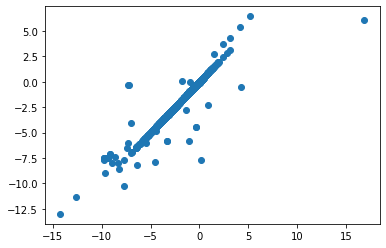

In [13]:
import matplotlib.pyplot as plt

plt.scatter(df_join['mmsplice_dlogitPsi'], df_join['delta_logit_psi'])

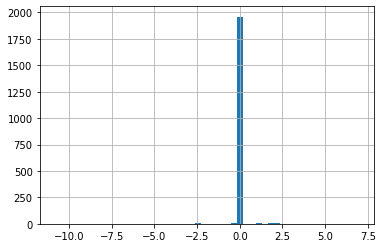

In [14]:
(df_join['delta_logit_psi'] - df_join['mmsplice_dlogitPsi']).hist(bins=50)